# Image Segmentation:

When we are working with images, it is often necessary to partition images into layers or segments to make the analysis easier. Most of the time, we need to detect objects in images, so separating surfaces in an image is very useful in object detection. Creating segments by grouping pixel values of an image using smart masks is known as Image Segmentation. These algorithms that cluster pixel values, generally do so based on two basic properties of intensity values: discontinuity and similarity. In discontinuity, the partitioning of an image is carried out based on changes in intensity, such as edges in an image. In similarity, partitioning an image into regions is done based on similarities that comply with a pre-defined criteria. Thresholding, region growing, and region splitting and merging are examples of methods in this category.  

There are two types of image segmentation:
 - Supervised
 - Unsupervised

### Supervised Segmentation:
As the name implies, we need supervision in the shape of prior knowledge (human input) to guide the algorithm. The most basic supervised segmentation technique is **thresholding**, which we discussed in "**Thresholding**" part of this tutorial. In that section, we had decided on an appropriate threshold for the image by inspecting its histogram. Please refer to that section for more detail. 
Here, we will talk about some other supervised segmentation techniques namely **Active Contour** method and **Random Walker** method.
### Unsupervised Segmentation:
In unsupervised segmentation, the algorithms subdivide images into meaningful segments automatically without any human help, although users can still tweak the parameters of the algorithms. In "**Thresholding**" part of this tutorial, we had mentioned other types of thresholding techniques like Otsu, Li, and Yen methods among others. These techniques did not rely on our input. We simply used try_all_threshold() function from skimage.filters to produce the thresholds for each algorithm. Again we will not go into detail about these algorithms in this part of the tutorial, rather we will talk about two other unsupervised techniques called **Simple Linear Iterative Clustering (SLIC)**, and **Felzenszwalb Clustering**.      


## Supervised Segmentation:
### Active Contour Method:
There are different kinds of Active Contour Methods. We will focus on Snake Model here.

Contours are the boundaries of objects in an image. When we need to detect certain objects in an image, we need to separate the pixels of interest from the rest of the image. Active Contour is a segmentation process that contructs closed contours around objects of interest that may have uneven shapes. 

First, we define a contour around the area of interest, then the algorithm reshapes this contour based on light and edge differences to identify and outline the object of interest. Let's try to identify and outline the face in the following image: 

In [1]:
# Importing the required libraries
import skimage.io as io
import skimage
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import gaussian 
from skimage.segmentation import active_contour
from skimage.segmentation import random_walker
from skimage import draw
from skimage.segmentation import slic, mark_boundaries
from skimage.color import label2rgb
from skimage.segmentation import felzenszwalb, mark_boundaries

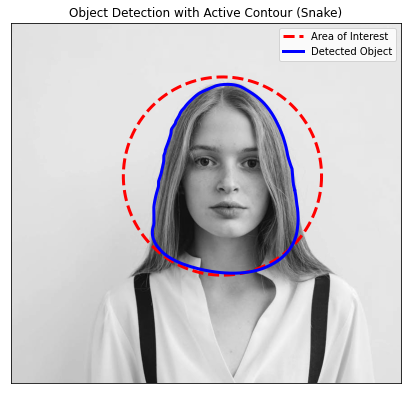

In [2]:
#Load the image
lady = io.imread('lady.jpeg')
#Turn the original image to grayscale
gray_lady = rgb2gray(lady)
#Denoise the image
image = gaussian(gray_lady, 1.5, preserve_range=False)
#We will define a circle that encircles the area of interest:
#Create 400 points (in radians) in between 0 and 2*Pi
#By using these points draw a circle with the help of
# sine and cosine functions. The radius is 220 and the 
# center positioned right in the middle of the area of interest.
s = np.linspace(0, 2*np.pi, 400)
r = 340 + 220*np.sin(s)
c = 470 + 220*np.cos(s)
#Create the (x,y) coordinates of the circle by combining 
#two lists of data points
init = np.array([r,c]).T
#Apply Active Contour algorithm to the specified area:
snake = active_contour(image,
init, alpha=0.0013, beta=10, gamma=0.0007)
#Draw the pre-defined area and created contour around 
#the face on the image:
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title('Object Detection with Active Contour (Snake)')
ax.imshow(gray_lady, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.legend(['Area of Interest', 'Detected Object'])
ax.axis([0, image.shape[1], image.shape[0], 0])
plt.show()

Before, we mentioned supervised learning requires human guidance. Here, drawing a red circle around the area of interest was that human input. Active Contour algorithm took this pre-defined contour and reshaped it based on the pixel differences around the head. After adjusting the parameters alpha and gamma a few times, we found the perfect contour.  

### Random Walker Method:
The random walker algorithm determines the segmentation of an image by employing user-defined markers labeling several surfaces. These markers are also known as seeds. 

A random walk means we start at a point and randomly move around the image. After the user places seeds labeling the surfaces for each pixel, the algorithm starts a random walker and calculates the probabilities of it reaching to all seeds. The seed it arrives first is given the highest probability, therefore that pixel is considered as belonging to that seed (surface). For example, for the image above, we could put some markers on the background and some on the face. The algorithm would then label each pixel as belonging to either the background or the face. 

In the following code, we will draw two circles. The bigger circle surrounding the head will label background pixels and the little circle in the middle of the face will label face pixels. Our goal is to detect pixels belonging to the face only.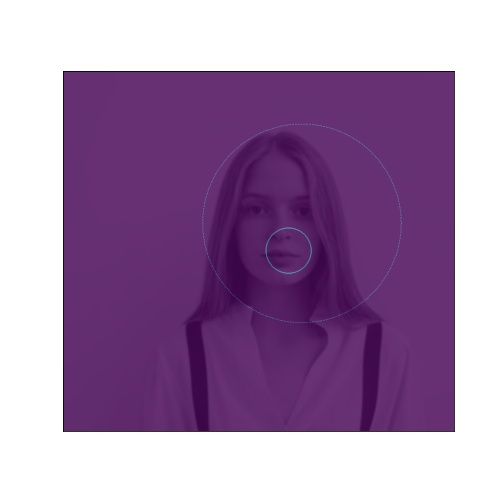

<ipython-input-3-dab0059c3a29>:19: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  image_segmented = random_walker(image, image_labels, beta=25000)


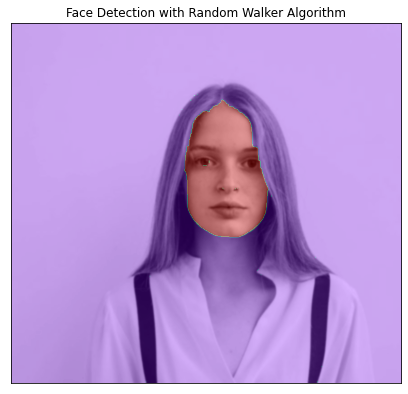

In [3]:
#Generate seeds for the background in the 
#shape of a circle.
s = np.linspace(0, 2*np.pi, 400)
r = 340 + 220*np.sin(s)
c = 530 + 220*np.cos(s)
#Create the (x,y) coordinates of the circle by combining 
#two lists of data points
init = np.array([r,c]).T
#Generate seeds for the face in the shape of a circle
indices = draw.circle_perimeter(400,500,50)
#Create a mask that has the seeds (label image)
#for random walker algorithm
image_labels = np.zeros(image.shape, dtype=np.uint8)
#The circle on the face will have values of one
image_labels[indices] = 1
#The circle around the head will have values of two
image_labels[init[:, 0].astype(int), init[:, 1].astype(int)] = 2
#Run Random Walker
image_segmented = random_walker(image, image_labels, beta=25000)
#Plot the image highlighting the detected area
fig, ax = plt.subplots(figsize=(7,7))
ax.set_title('Face Detection with Random Walker Algorithm')
ax.imshow(image,cmap=plt.cm.gray)
ax.imshow(image_segmented == 1, alpha=0.3,cmap='rainbow')
ax.axis([0,image.shape[1], image.shape[0],0])
ax.set_xticks([]) 
ax.set_yticks([])
plt.show()


Random walker algorithm detected the face almost perfectly with the given parameters. 

## Unsupervised Segmentation: 
Unsupervised Segmentation as the name implies, does not need supervision. No labeling or drawing areas of interests by humans is required. So, based on what do the algorithms make their decisions? The only thing they are given; the data. In our case, pixel values of images. They simply try to derive similarities between pixel values and put similar ones in the same clusters. It could be thought of doing puzzles with very small pieces. At first, we don't have any idea what goes where, so we simply categorize the pieces based on their colors. Then we may categorize them based on object edges and so on.. This is essentially what clustering is.

Just like one puzzle piece is meaningless to us, a pixel taken out of an image does not offer much information about the image. If we could group pixels and form larger groups based on their color, we could derive more logical meanings. These larger groups of pixels are known as **superpixels**. Dividing an image into superpixels is known as **Superpixel Segmentation**. This method is useful in many computer vision tasks like image classification and visual tracking.

In the following, we will explore two Superpixel Segmentation techniques called **Simple Linear Iterative Clustering (SLIC)** and **Felzenszwalb Clustering**.

### Simple Linear Iterative Clustering (SLIC):
This algorithm simply performs K-means clustering. It creates clusters based on color and location in 5D space. The compactness parameter determines color-similarity and proximity, while n_segments chooses the number of centers for kmeans. 

Text(0.5, 1.0, 'Original Image')

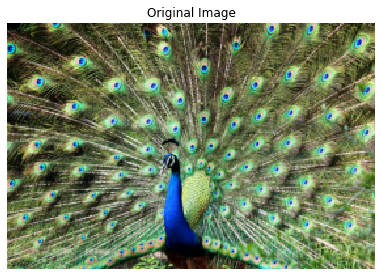

In [4]:
#Load, rescale and display the image:
image = io.imread('peacock.jpg')
image = skimage.transform.rescale(image,0.25, multichannel=True, anti_aliasing=True)
skimage.io.imshow(image)
plt.axis('off')
plt.title('Original Image')


<a href=https://www.pexels.com/photo/blue-and-green-peacock-638738/>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


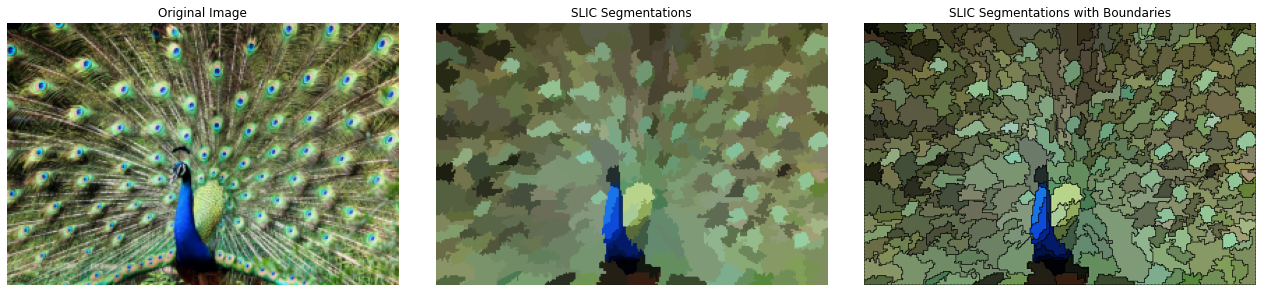

In [5]:
#Create superpixel segments by applying SLIC algorithm to the image:
segments = slic(image, n_segments=500, compactness=10,start_label=1)
#For each segment, find the average pixel value by using the original image
#and assign it to that segment.
segmented_image = label2rgb(segments, image, kind='avg', bg_label=0)
#Plot the original, and segmented images. 
fig, ax = plt.subplots(ncols=3, figsize=(18, 16))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(segmented_image)
ax[1].set_title('SLIC Segmentations')
#Plot the segmented image with segment boundaries
ax[2].imshow(mark_boundaries(segmented_image, segments, color=(0,0,0),mode='subpixel'))
ax[2].set_title('SLIC Segmentations with Boundaries')
plt.tight_layout()
for a in ax:
    a.axis('off')


### Felzenszwalb Clustering:
This algorithm produces segmentations of a multichannel image by using tree based clustering. "Scale" parameter controls the number of segments as well as their size. "Sigma" value is for the Gaussian filter. "Min_size" is the minimum component size.
Let's apply it to the peacock image:

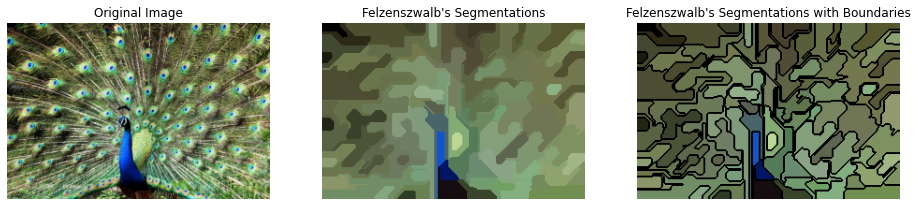

In [6]:
# computing the Felzenszwalb's Segmentation
image_segments = felzenszwalb(image, scale = 2, sigma=5,
                                                min_size=100)
#For each segment, find the average pixel value and assign it to the segment
segmented_image = label2rgb(image_segments, image, kind='avg', bg_label=0)
# Plotting the original image
fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(16, 14))
ax[0].imshow(image)
ax[0].set_title('Original Image')
#Plotting the segmented image
ax[1].imshow(segmented_image)
ax[1].set_title('Felzenszwalb\'s Segmentations')
# Marking the boundaries of
# Felzenszwalb's segmentations
ax[2].imshow(mark_boundaries(segmented_image, image_segments,color=(0,0,0)))
ax[2].set_title('Felzenszwalb\'s Segmentations with Boundaries')
for a in ax:
    a.axis('off')

Image segmentation techniques are great tools to have in our arsenal as they come in handy in many aspects of image processing like object detection.  